# Tutorial 2:  Quantum Transport in 2D materials

In [ ]:
dptb esk bn_spds.json -o hbn_spd_model
dptb config -m hbn_spd_model/sktb.json -tr -sk ./

"onsite": {
    "method": "strain"
}

dptb train input.json -i ../extra_baseline/hbn_spd_model/sktb.json -o train_out
dptb run band.json -i train/train_out/checkpoint/nnsk.best.pth -o band_plot

In [1]:
import os
from pathlib import Path
workdir='../../examples/graphene'
wd = Path(workdir)
if not wd.is_dir():
    raise FileNotFoundError(f"Workdir '{wd}' not found. Please adjust 'workdir'.")
os.chdir(wd)
print("\t".join(sorted(os.listdir("."))))

band.json	band_plot	extr_baseline	train


In [2]:
from dpnegf.utils.loggers import set_log_handles
import logging
from pathlib import Path


results_path = '../band_plot'
log_path = os.path.join(results_path, 'log')
log_level = logging.INFO
set_log_handles(log_level, Path(log_path) if log_path else None)

DPNEGF INFO    ================================================================================
DPNEGF INFO                                      Version Info                                  
DPNEGF INFO    --------------------------------------------------------------------------------


DPNEGF INFO    DPNEGF               : 0.1.1.dev97+bccd946
DPNEGF INFO    DeePTB               : 2.1.2.dev53+5b97981
DPNEGF INFO    ================================================================================



In [3]:
from dptb.nn.build import build_model

model =  "./train/train_out/checkpoint/nnsk.best.pth" # the model for demonstration

model = build_model(model)

DPNEGF INFO    The ['overlap_param'] are frozen!
DPNEGF INFO    The ['overlap_param'] are frozen!


In [4]:
from ase.io import read
structure =  "./train/data/POSCAR" 
atoms = read(structure)
atoms

Atoms(symbols='C2', pbc=True, cell=[[2.5039999485, 0.0, 0.0], [-1.2519999743, 2.1685275665, 0.0], [0.0, 0.0, 30.0]])

DPNEGF WARNING eig_solver is not set, using default 'torch'.
DPNEGF INFO    KPOINTS  klist: 300 kpoints
DPNEGF INFO    The eigenvalues are already in data. will use them.
DPNEGF INFO    Calculating Fermi energy in the case of spin-degeneracy.
DPNEGF INFO    Fermi energy converged after 20 iterations.
DPNEGF INFO    q_cal: 8.000001001159495, total_electrons: 8.0, diff q: 1.001159494862236e-06
DPNEGF INFO    Estimated E_fermi: -4.0844590057224 based on the valence electrons setting nel_atom : {'C': 4} .
DPNEGF INFO    No Fermi energy provided, using estimated value: -4.0845 eV


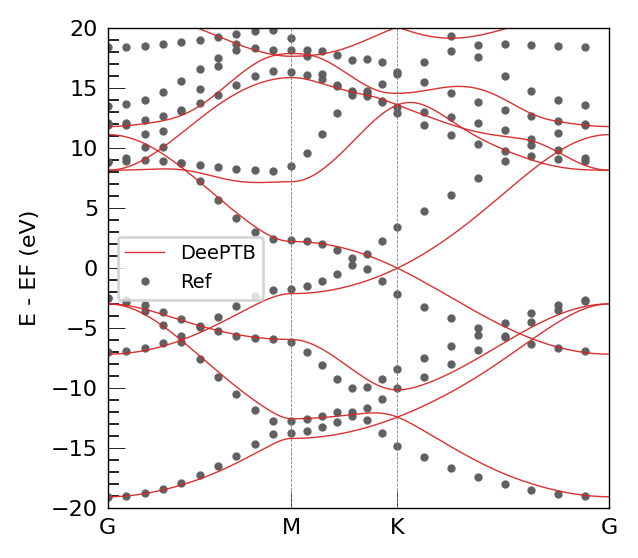

In [ ]:
from dptb.postprocess.bandstructure.band import Band
import shutil

task_options = {
        "task": "band",
        "kline_type":"abacus",
        "kpath":[
                [0, 0, 0, 110],
                [0.5, 0, 0, 84],
                [0.3333333, 0.3333333, 0, 95],
                [0, 0, 0, 1]
                ],
        "klabels":["G", "M", "K", "G"],
        "emin":-20,
        "emax": 20,
        "nel_atom":{"C": 4},
        "ref_band": "/personal/zjj/transiesta_cal/graphene_formal/dptb_train_input/data/data_graphene_siesta2/eigs.npy"

       }

if os.path.isdir(results_path):
    shutil.rmtree(results_path, ignore_errors=True) 

band = Band(model, results_path)
AtomicData_options = { "pbc": True}
band.get_bands(data = atoms, 
               kpath_kwargs = task_options,
               AtomicData_options = AtomicData_options)
band.band_plot(emin = task_options['emin'],
               emax = task_options['emax'],
               ref_band = task_options['ref_band'],)